In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Data

In [2]:
from sklearn.datasets import load_boston

In [3]:
data = load_boston()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


# Model 

In [4]:
from lightgbm import LGBMRegressor

In [5]:
model = LGBMRegressor()
model.fit(X, y)
model.score(X, y)

0.9817303080128028

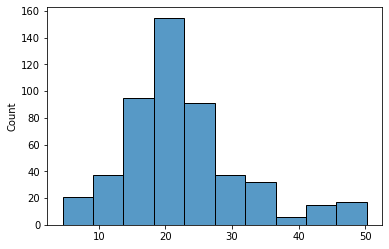

In [6]:
preds = model.predict(X)

sns.histplot(preds, bins=10)
plt.show()

# SHAP

In [7]:
import shap
shap.initjs()

In [8]:
explainer = shap.Explainer(model)
shap_values = explainer(X)

# Local Interpretation 

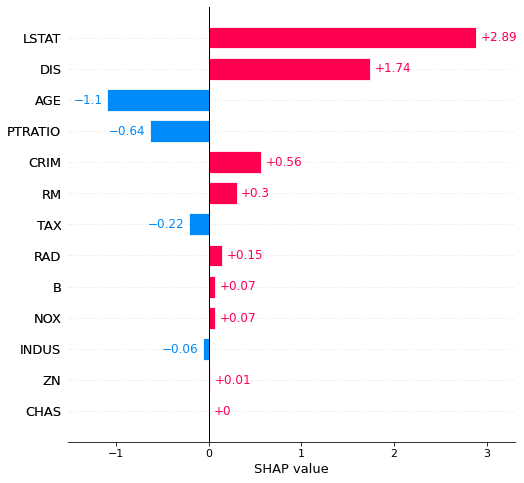

In [9]:
house_id = 100
shap.plots.bar(shap_values[house_id, :], max_display=None)

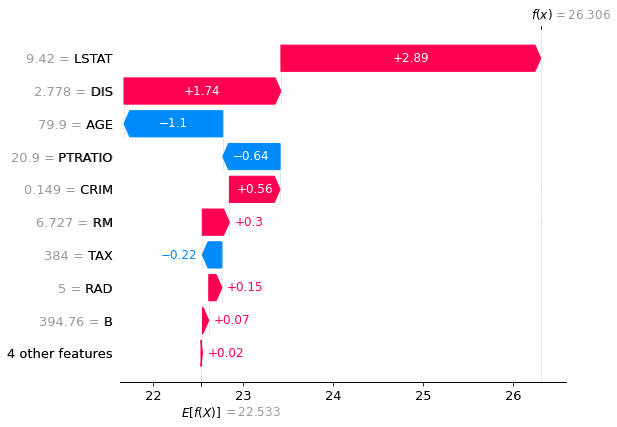

In [10]:
shap.plots.waterfall(shap_values[house_id, :])

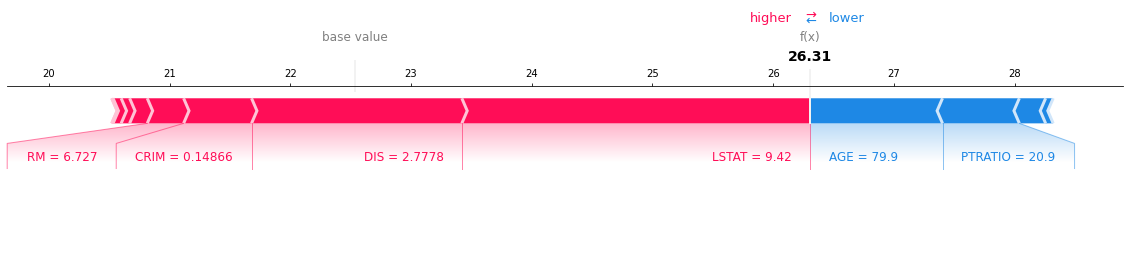

In [11]:
shap.plots.force(shap_values.base_values[house_id], 
                 shap_values.values[house_id], 
                 X.iloc[house_id], 
                 matplotlib=True)

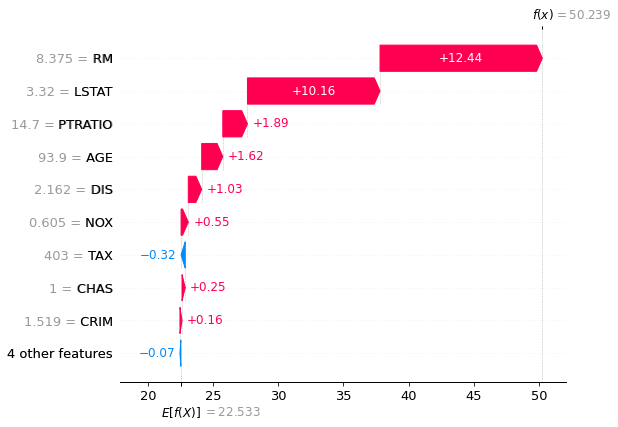

In [12]:
# Highest predicted price 

house_id = np.argmax(preds)
shap.plots.waterfall(shap_values[house_id, :])

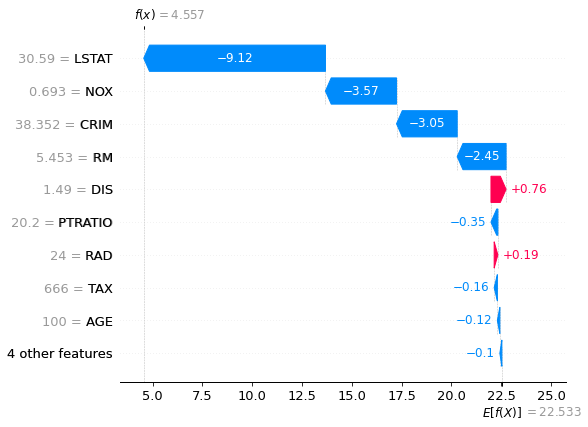

In [13]:
# Lowest predicted price 

house_id = np.argmin(preds)
shap.plots.waterfall(shap_values[house_id, :])

# Feature Importance 

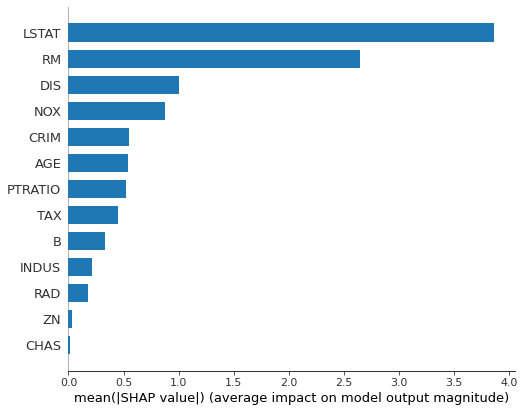

In [14]:
shap.summary_plot(shap_values, plot_type='bar', color='tab:blue')

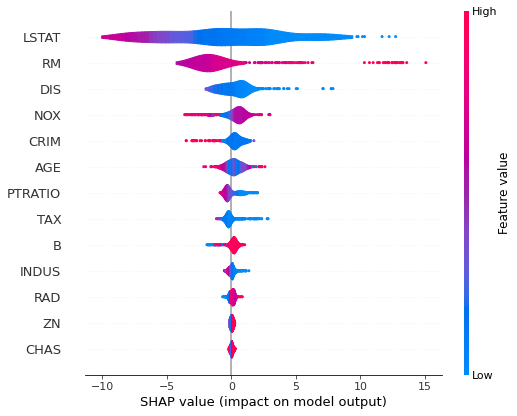

In [15]:
shap.summary_plot(shap_values, plot_type='violin')

# Partial Dependence 

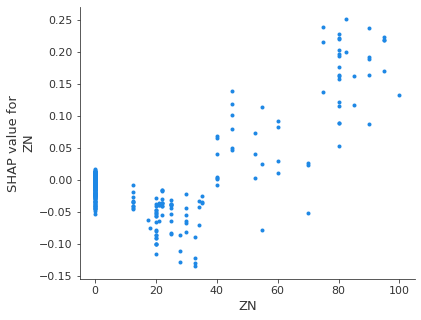

In [16]:
shap.dependence_plot(1, shap_values.values, X, 
                     interaction_index=None)

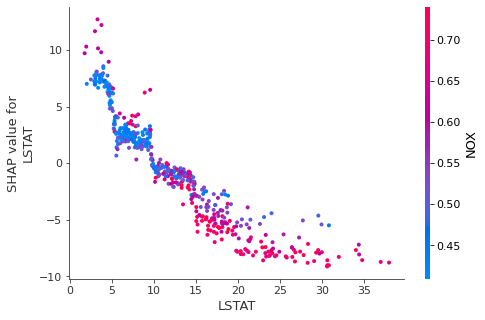

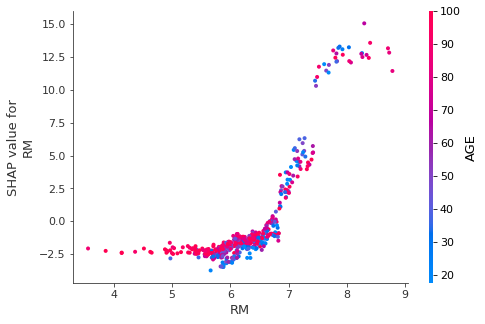

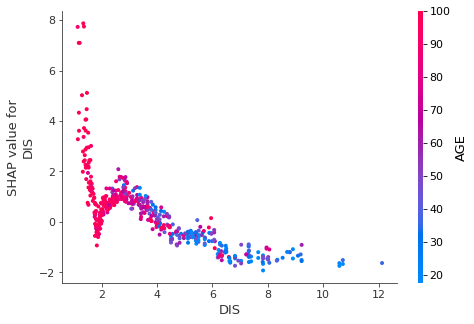

In [17]:
for i in range(len(X.columns[:3])):
    shap.dependence_plot('rank({})'.format(i), shap_values.values, X)

# Embeded Plots 

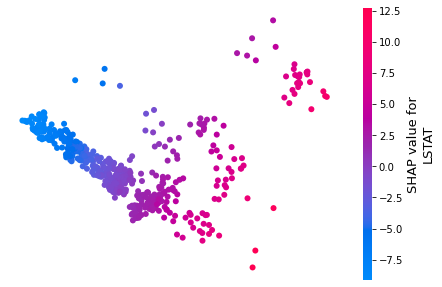

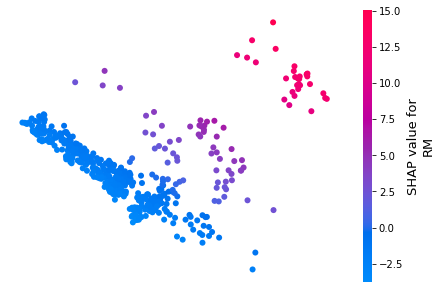

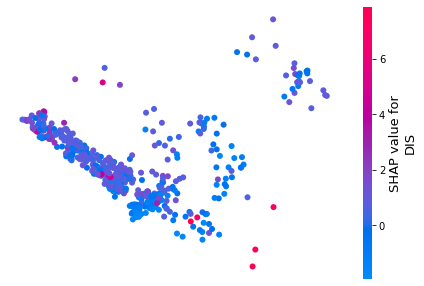

In [18]:
for i in range(len(X.columns[:3])):
        shap.embedding_plot('rank({})'.format(i), shap_values.values, 
                        feature_names=X.columns)